## Phase 3 Final Project Submission

Please fill out:
* Student name: Victor Kigen, 
* Student pace: Full time hybrid
* Scheduled project review date/time: 
* Instructor name: Mwikali



### Project Overview


### Business Understanding


Tanzania is a third world country. As of 2024 December, the country has a population of 67.44 million people. As with many third wold countries, access to clean water is a major challenge. Through both public and private participation, the country has been able to install water pumps across the country. Unforturnetly, a number of these water points require repairs or are completely not functional. 

Alot of factors affect the functionality/availablity of the water points including:
1. Geographical Loction
2. Environmental conditions
3. Water pump specifications
4. Maintenance schedules
5. Water quality

The aim of this project is to develop various machine learning models using different techniques. The models will help to categorise the water points into 3 different groups:

1. Functional
2. Non-Functional
3. Requires Repair

The stakeholders for this project include:

1. Government of Tanzania
2. NGOs in the country
3. Private Limited Companies

With this classification, the stakeholders can take corrective action to improve the situation. The results will significantly increase the effeciency of the implementation plan as the associated parties will be able to: 

1. Introduce preventative maintanance
2. Create an effective resource allocation plan
3. Improve future water points installations

The project hopeful will lead to an increase in socio-economice development in Tanzania by ensuring sustainability through clean water sources across the country. 

### Data Understanding

First step is to import the required libraries for the project and load the csv files that contain the data.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import folium
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification

# Adjust pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)       # Adjust the display width to fit the data

In [50]:
# Loading Test set values data
test_set_values_data = pd.read_csv("test_set_values.csv")

# Loading Training set labels data
training_set_labels_data = pd.read_csv("training_set_labels.csv")

# Loading Training Set Values data
training_set_values_data = pd.read_csv("training_set_values.csv")

We shall create a function that reads the csv files, get the summary and display the first 5 rows. 

In [51]:
def understand_data(data, label):
    print(f"Data Name: {label}")
    print("\nDataset Information:")
    data.info()
    print("\nSample Data:")
    print(data.head())


### Data Preparation

### Dropping irrelevant columns

In [52]:
understand_data(test_set_values_data,'Test Set Values')

Data Name: Test Set Values

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  distr

From my analysis of this dataset, the irrelevant columns are:

1. wpt_name: Name of the waterpoint (not relevant for our analysis).
2. num_private: Number of private pumps (not relevant for our analysis).
3. subvillage: Subvillage location (not relevant for our analysis).
4. district_code: District code (not relevant for our analysis).
5. lga: Local government authority (not relevant for our analysis).
6. ward: Administrative ward (not relevant for our analysis).
7. public_meeting: Whether there was a public meeting related to the waterpoint (not relevant for our analysis).
8. recorded_by: Entity recording the data (not relevant for our analysis).
9. scheme_name: Name of the waterpoint scheme (not relevant for our analysis).
10. extraction_type_group: Grouped extraction type (redundant with 'extraction_type').
11. extraction_type_class: Classification of extraction type (redundant with 'extraction_type').
12. management_group: Grouped management type (redundant with 'management').
13. payment_type: Payment method (redundant with 'payment').
14. quality_group: Grouped water quality (redundant with 'water_quality').
15. quantity_group: Grouped water quantity (redundant with 'quantity').
16. source_type: Source type (redundant with 'source').
17. source_class: Source class (redundant with 'source').
19. waterpoint_type_group: Grouped waterpoint type (redundant with 'waterpoint_type').

As a result, we shall drop them.

In [53]:
# dropping unnessesary columns
columns_to_drop = ['wpt_name', 'num_private', 'subvillage', 'district_code', 'lga', 'ward', 
                   'public_meeting', 'recorded_by', 'scheme_name', 'extraction_type_group', 
                   'extraction_type_class', 'management_group', 'payment_type', 'quality_group', 
                   'quantity_group', 'source_type', 'source_class', 'waterpoint_type_group']

test_set_values_data = test_set_values_data.drop(columns=columns_to_drop)

test_set_values_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,region_code,population,scheme_management,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Internal,Manyara,21,321,Parastatal,True,2012,other,parastatal,never pay,soft,seasonal,rainwater harvesting,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Pangani,Arusha,2,300,VWC,True,2000,gravity,vwc,never pay,soft,insufficient,spring,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Internal,Singida,13,500,VWC,NaN,2010,other,vwc,never pay,soft,insufficient,rainwater harvesting,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Ruvuma / Southern Coast,Lindi,80,250,VWC,True,1987,other,vwc,unknown,soft,dry,shallow well,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Ruvuma / Southern Coast,Ruvuma,10,60,Water Board,True,2000,gravity,water board,pay monthly,soft,enough,spring,communal standpipe


In [54]:
understand_data(training_set_labels_data,'Training Set Labels')

Data Name: Training Set Labels

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB

Sample Data:
      id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional


In [55]:
understand_data(training_set_values_data,'Training Set Values Data')

Data Name: Training Set Values Data

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 

The test set and the training set have the same columns so we shall drop them as well.

In [56]:
training_set_values_data = training_set_values_data.drop(columns=columns_to_drop)

training_set_values_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,region_code,population,scheme_management,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,11,109,VWC,False,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,20,280,Other,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,21,250,VWC,True,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90,58,VWC,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,18,0,NaN,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe


### Dealing with missing data

In [57]:
training_set_values_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59400 non-null  int64  
 1   amount_tsh         59400 non-null  float64
 2   date_recorded      59400 non-null  object 
 3   funder             55765 non-null  object 
 4   gps_height         59400 non-null  int64  
 5   installer          55745 non-null  object 
 6   longitude          59400 non-null  float64
 7   latitude           59400 non-null  float64
 8   basin              59400 non-null  object 
 9   region             59400 non-null  object 
 10  region_code        59400 non-null  int64  
 11  population         59400 non-null  int64  
 12  scheme_management  55523 non-null  object 
 13  permit             56344 non-null  object 
 14  construction_year  59400 non-null  int64  
 15  extraction_type    59400 non-null  object 
 16  management         594

In [58]:
def replace_missing_data(data, columns):
    """
    Replaces missing values in the specified columns with their respective mode.
    
    Parameters:
    - data: pandas DataFrame containing the data.
    - columns: list of column names (or a single column name as a string) to replace missing values.
    """
    if isinstance(columns, str):
        columns = [columns]  # Convert to a list if a single column is passed as a string
    
    for column in columns:
        if column in data.columns:  # Check if the column exists in the DataFrame
            column_mode = data[column].mode()[0]  # Calculate the mode of the column
            data[column].fillna(column_mode, inplace=True)
        else:
            print(f"Column '{column}' does not exist in the DataFrame.")

funder, installer, scheme_management and permit have some missing data.

In [59]:
columns_to_clean = ['funder','installer','scheme_management','permit']

replace_missing_data(training_set_values_data,columns_to_clean)

training_set_values_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59400 non-null  int64  
 1   amount_tsh         59400 non-null  float64
 2   date_recorded      59400 non-null  object 
 3   funder             59400 non-null  object 
 4   gps_height         59400 non-null  int64  
 5   installer          59400 non-null  object 
 6   longitude          59400 non-null  float64
 7   latitude           59400 non-null  float64
 8   basin              59400 non-null  object 
 9   region             59400 non-null  object 
 10  region_code        59400 non-null  int64  
 11  population         59400 non-null  int64  
 12  scheme_management  59400 non-null  object 
 13  permit             59400 non-null  bool   
 14  construction_year  59400 non-null  int64  
 15  extraction_type    59400 non-null  object 
 16  management         594

In [60]:
test_set_values_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14850 non-null  int64  
 1   amount_tsh         14850 non-null  float64
 2   date_recorded      14850 non-null  object 
 3   funder             13981 non-null  object 
 4   gps_height         14850 non-null  int64  
 5   installer          13973 non-null  object 
 6   longitude          14850 non-null  float64
 7   latitude           14850 non-null  float64
 8   basin              14850 non-null  object 
 9   region             14850 non-null  object 
 10  region_code        14850 non-null  int64  
 11  population         14850 non-null  int64  
 12  scheme_management  13881 non-null  object 
 13  permit             14113 non-null  object 
 14  construction_year  14850 non-null  int64  
 15  extraction_type    14850 non-null  object 
 16  management         148

same columns are missing data as well, so we will run the same function to deal with them.

replace_missing_data(test_set_values_data,columns_to_clean)
test_set_values_data.info()

Analysising the three datasets, we see that the training_data_set and the test_data_set are identical with an id column that is common. The training_set_labels_data contains only the id and status group. So using the id column we can merge the dataset into one to simplify work going fowards. 

In [61]:
merged_df = pd.concat([test_set_values_data, training_set_values_data])
merged_df['status_group'] = np.nan
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 59399
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 74250 non-null  int64  
 1   amount_tsh         74250 non-null  float64
 2   date_recorded      74250 non-null  object 
 3   funder             73381 non-null  object 
 4   gps_height         74250 non-null  int64  
 5   installer          73373 non-null  object 
 6   longitude          74250 non-null  float64
 7   latitude           74250 non-null  float64
 8   basin              74250 non-null  object 
 9   region             74250 non-null  object 
 10  region_code        74250 non-null  int64  
 11  population         74250 non-null  int64  
 12  scheme_management  73281 non-null  object 
 13  permit             73513 non-null  object 
 14  construction_year  74250 non-null  int64  
 15  extraction_type    74250 non-null  object 
 16  management         742

In [62]:
duplicates = merged_df[merged_df.duplicated(subset='id', keep=False)]

# Check if there are any duplicates
if not duplicates.empty:
    # Get the first duplicate row
    first_duplicate = duplicates.iloc[0]
    print(first_duplicate)
else:
    print("No duplicates found based on the 'id' column.")

No duplicates found based on the 'id' column.


No duplicates found in the merged dataframe. As a result, we can add an extra column called status_group so that we can merge the last dataset. 

In [63]:
# Extract id columns as sets
ids_values = set(merged_df['id'])
ids_labels = set(training_set_labels_data['id'])

# Find common ids
common_ids = ids_values.intersection(ids_labels)

# Number of common ids
num_common_ids = len(common_ids)
print(f"Number of common ids: {num_common_ids}")

Number of common ids: 59400


In [64]:
# Make a copy of the original DataFrame
training_set_labels_data_copy = training_set_labels_data.copy()

# Iterate through each row in the copy of training_set_labels_data
for index, row in training_set_labels_data_copy.iterrows():
    id_value = row['id']
    status_group = row['status_group']
    
    # Check if the id exists in merged_df
    if id_value in merged_df['id'].values:
        # Replace the value in merged_df['status_group'] where the id matches
        merged_df.loc[merged_df['id'] == id_value, 'status_group'] = status_group
        
        # Drop the row from the copy of training_set_labels_data
        training_set_labels_data_copy.drop(index, inplace=True)

# Optionally, reset the index after dropping rows to keep the index clean
training_set_labels_data_copy.reset_index(drop=True, inplace=True)

# Display the updated DataFrames
print(merged_df.head())
print(training_set_labels_data_copy.head())


      id  amount_tsh date_recorded                  funder  gps_height  \
0  50785         0.0    2013-02-04                    Dmdd        1996   
1  51630         0.0    2013-02-04  Government Of Tanzania        1569   
2  17168         0.0    2013-02-01                     NaN        1567   
3  45559         0.0    2013-01-22              Finn Water         267   
4  49871       500.0    2013-03-27                  Bruder        1260   

    installer  longitude   latitude                    basin   region  \
0        DMDD  35.290799  -4.059696                 Internal  Manyara   
1         DWE  36.656709  -3.309214                  Pangani   Arusha   
2         NaN  34.767863  -5.004344                 Internal  Singida   
3  FINN WATER  38.058046  -9.418672  Ruvuma / Southern Coast    Lindi   
4      BRUDER  35.006123 -10.950412  Ruvuma / Southern Coast   Ruvuma   

   region_code  population scheme_management permit  construction_year  \
0           21         321        Parastat

### Water Pump Age

In [65]:
# Calculate the age of the waterpoint
current_year = pd.Timestamp.now().year
merged_df['age'] = current_year - merged_df['construction_year']

In [66]:
merged_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,region_code,population,scheme_management,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,status_group,age
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Internal,Manyara,21,321,Parastatal,True,2012,other,parastatal,never pay,soft,seasonal,rainwater harvesting,other,NaN,12
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Pangani,Arusha,2,300,VWC,True,2000,gravity,vwc,never pay,soft,insufficient,spring,communal standpipe,NaN,24
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Internal,Singida,13,500,VWC,NaN,2010,other,vwc,never pay,soft,insufficient,rainwater harvesting,other,NaN,14
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Ruvuma / Southern Coast,Lindi,80,250,VWC,True,1987,other,vwc,unknown,soft,dry,shallow well,other,NaN,37
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Ruvuma / Southern Coast,Ruvuma,10,60,Water Board,True,2000,gravity,water board,pay monthly,soft,enough,spring,communal standpipe,NaN,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,3,125,Water Board,True,1999,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,functional,25
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,11,56,VWC,True,1996,gravity,vwc,pay annually,soft,enough,river,communal standpipe,functional,28
59397,37057,0.0,2011-04-11,Government Of Tanzania,0,DWE,34.017087,-8.750434,Rufiji,Mbeya,12,0,VWC,False,0,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,functional,2024
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,1,0,VWC,True,0,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,functional,2024


### Create Master SQL table

In [67]:
 merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 59399
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 74250 non-null  int64  
 1   amount_tsh         74250 non-null  float64
 2   date_recorded      74250 non-null  object 
 3   funder             73381 non-null  object 
 4   gps_height         74250 non-null  int64  
 5   installer          73373 non-null  object 
 6   longitude          74250 non-null  float64
 7   latitude           74250 non-null  float64
 8   basin              74250 non-null  object 
 9   region             74250 non-null  object 
 10  region_code        74250 non-null  int64  
 11  population         74250 non-null  int64  
 12  scheme_management  73281 non-null  object 
 13  permit             73513 non-null  object 
 14  construction_year  74250 non-null  int64  
 15  extraction_type    74250 non-null  object 
 16  management         742

In [68]:
columns_to_clean = ['status_group']

replace_missing_data(merged_df,columns_to_clean)

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 59399
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 74250 non-null  int64  
 1   amount_tsh         74250 non-null  float64
 2   date_recorded      74250 non-null  object 
 3   funder             73381 non-null  object 
 4   gps_height         74250 non-null  int64  
 5   installer          73373 non-null  object 
 6   longitude          74250 non-null  float64
 7   latitude           74250 non-null  float64
 8   basin              74250 non-null  object 
 9   region             74250 non-null  object 
 10  region_code        74250 non-null  int64  
 11  population         74250 non-null  int64  
 12  scheme_management  73281 non-null  object 
 13  permit             73513 non-null  object 
 14  construction_year  74250 non-null  int64  
 15  extraction_type    74250 non-null  object 
 16  management         742

In [69]:
import sqlite3
import pandas as pd

# Establish a connection to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('merged_db.db')

# SQL query to create the table
sql_query = """
CREATE TABLE IF NOT EXISTS data_info (
    id INT PRIMARY KEY,
    amount_tsh FLOAT,
    date_recorded TEXT,
    funder TEXT,
    gps_height INT,
    installer TEXT,
    longitude FLOAT,
    latitude FLOAT,
    basin TEXT,
    region TEXT,
    region_code INT,
    population INT,
    scheme_management TEXT,
    permit BOOLEAN,
    construction_year INT,
    extraction_type TEXT,
    management TEXT,
    payment TEXT,
    water_quality TEXT,
    quantity TEXT,
    source TEXT,
    waterpoint_type TEXT,
    status_group TEXT
)
"""
conn.execute(sql_query)
conn.commit()

# Insert data into the database, preventing double insertion
for _, row in merged_df.iterrows():
    # Check if the id already exists in the database
    cur = conn.cursor()
    cur.execute("SELECT 1 FROM data_info WHERE id = ?", (row['id'],))
    if cur.fetchone() is None:  # If no record exists with the same id
        cur.execute("""
            INSERT INTO data_info (
                id, amount_tsh, date_recorded, funder, gps_height, installer, 
                longitude, latitude, basin, region, region_code, population, 
                scheme_management, permit, construction_year, extraction_type, 
                management, payment, water_quality, quantity, source, 
                waterpoint_type, status_group
            ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        """, tuple(row))
    # Commit each row insertion
    conn.commit()

# Verify data by querying the table
df_data = pd.read_sql("SELECT * FROM data_info", conn)
print(df_data.head())

# Close the connection
conn.close()


      id  amount_tsh date_recorded                  funder  gps_height  \
0  50785         0.0    2013-02-04                    Dmdd        1996   
1  51630         0.0    2013-02-04  Government Of Tanzania        1569   
2  17168         0.0    2013-02-01  Government Of Tanzania        1567   
3  45559         0.0    2013-01-22              Finn Water         267   
4  49871       500.0    2013-03-27                  Bruder        1260   

    installer  longitude   latitude                    basin   region  \
0        DMDD  35.290799  -4.059696                 Internal  Manyara   
1         DWE  36.656709  -3.309214                  Pangani   Arusha   
2         DWE  34.767863  -5.004344                 Internal  Singida   
3  FINN WATER  38.058046  -9.418672  Ruvuma / Southern Coast    Lindi   
4      BRUDER  35.006123 -10.950412  Ruvuma / Southern Coast   Ruvuma   

   region_code  population scheme_management  permit  construction_year  \
0           21         321        Parasta

<b>INT:</b> Used for integer columns such as id, gps_height, region_code, population, and construction_year.<br>
<b>FLOAT:</b> Used for columns that contain decimal values like amount_tsh, longitude, and latitude.<br>
<b>TEXT:</b> Used for string columns such as date_recorded, funder, installer, etc.<br>
<b>BOOLEAN:</b> Used for boolean columns like permit.

### Dealing with Categorical Variables

In order to use a categorical variable in a model, we'll create multiple dummy variables, one for each category of the categorical variable. This method, known as one hot encoding enables us to convert the data into binary vectors. First step is to identify the categorical columns:

In [70]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 59399
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 74250 non-null  int64  
 1   amount_tsh         74250 non-null  float64
 2   date_recorded      74250 non-null  object 
 3   funder             73381 non-null  object 
 4   gps_height         74250 non-null  int64  
 5   installer          73373 non-null  object 
 6   longitude          74250 non-null  float64
 7   latitude           74250 non-null  float64
 8   basin              74250 non-null  object 
 9   region             74250 non-null  object 
 10  region_code        74250 non-null  int64  
 11  population         74250 non-null  int64  
 12  scheme_management  73281 non-null  object 
 13  permit             73513 non-null  object 
 14  construction_year  74250 non-null  int64  
 15  extraction_type    74250 non-null  object 
 16  management         742

In [71]:
categorical = ['funder', 'installer', 'basin', 'region', 'scheme_management', 
                       'permit', 'extraction_type', 'management', 'payment', 
                       'water_quality', 'quantity','status_group', 'source']
merged_df_scaled = pd.get_dummies(merged_df, columns=categorical, dtype=int)
merged_df_scaled

id  amount_tsh date_recorded  gps_height  longitude   latitude  \
0      50785         0.0    2013-02-04        1996  35.290799  -4.059696   
1      51630         0.0    2013-02-04        1569  36.656709  -3.309214   
2      17168         0.0    2013-02-01        1567  34.767863  -5.004344   
3      45559         0.0    2013-01-22         267  38.058046  -9.418672   
4      49871       500.0    2013-03-27        1260  35.006123 -10.950412   
...      ...         ...           ...         ...        ...        ...   
59395  60739        10.0    2013-05-03        1210  37.169807  -3.253847   
59396  27263      4700.0    2011-05-07        1212  35.249991  -9.070629   
59397  37057         0.0    2011-04-11           0  34.017087  -8.750434   
59398  31282         0.0    2011-03-08           0  35.861315  -6.378573   
59399  26348         0.0    2011-03-23         191  38.104048  -6.747464   

       region_code  population  construction_year     waterpoint_type   age  \
0               21         321               2012               other    12   
1                2         300               2000  communal standpipe    24   
2               13         500               2010               other    14   
3               80         250               1987               other    37   
4               10          60               2000  communal standpipe    24   
...            ...         ...                ...                 ...   ...   
59395            3         125               1999  communal standpipe    25   
59396           11          56               1996  communal standpipe    28   
59397           12           0                  0           hand pump  2024   
59398            1           0                  0           hand pump  2024   
59399            5         150               2002           hand pump    22   

       funder_0  funder_A/co Germany  funder_Aar  funder_Abas Ka  \
0             0                    0           0               0   
1             0                    0           0               0   
2             0                    0           0               0   
3             0                    0           0               0   
4             0                    0           0               0   
...         ...                  ...         ...             ...   
59395         0                    0           0               0   
59396         0                    0           0               0   
59397         0                    0           0               0   
59398         0                    0           0               0   
59399         0                    0           0               0   

       funder_Abasia  funder_Abc-ihushi Development Cent  funder_Abd  \
0                  0                                   0           0   
1                  0                                   0           0   
2                  0                                   0           0   
3                  0                                   0           0   
4                  0                                   0           0   
...              ...                                 ...         ...   
59395              0                                   0           0   
59396              0                                   0           0   
59397              0                                   0           0   
59398              0                                   0           0   
59399              0                                   0           0   

       funder_Abdala  funder_Abddwe  funder_Abdul  funder_Abood  funder_Abs  \
0                  0              0             0             0           0   
1                  0              0             0             0           0   
2                  0              0             0             0           0   
3                  0              0             0             0           0   
4                  0              0             0             0        

In [72]:
print(merged_df.shape)


(74250, 24)


The permit column contains boolean data so we need convert it into numerical. 

In [73]:
merged_df['permit'].unique()

array([True, nan, False], dtype=object)

In [74]:
print(merged_df['permit'].isna().sum())


737


In [75]:
# Find the mode of the 'permit' column
mode_value = merged_df['permit'].mode()[0]

# Replace NaN values with the mode
merged_df['permit'] = merged_df['permit'].fillna(mode_value)

# Check if NaN values are replaced
print(merged_df['permit'].isna().sum())  # Should now be 0

0


In [76]:
merged_df['permit'] = merged_df['permit'].map({True: 1, False: 0})
merged_df_scaled['permit'] = merged_df['permit']

print(merged_df)


          id  amount_tsh date_recorded                  funder  gps_height  \
0      50785         0.0    2013-02-04                    Dmdd        1996   
1      51630         0.0    2013-02-04  Government Of Tanzania        1569   
2      17168         0.0    2013-02-01                     NaN        1567   
3      45559         0.0    2013-01-22              Finn Water         267   
4      49871       500.0    2013-03-27                  Bruder        1260   
...      ...         ...           ...                     ...         ...   
59395  60739        10.0    2013-05-03         Germany Republi        1210   
59396  27263      4700.0    2011-05-07             Cefa-njombe        1212   
59397  37057         0.0    2011-04-11  Government Of Tanzania           0   
59398  31282         0.0    2011-03-08                   Malec           0   
59399  26348         0.0    2011-03-23              World Bank         191   

        installer  longitude   latitude                    basi

### Data Visualisation

I will produce different visualisations spread between Tabluea and the notebook. In order to use Tableau, I have created a csv file with the merged data as shown below. 

In [77]:
# CSV file name
filename = 'merged_data.csv'

# Write the airplane_make_df DataFrame to the CSV file
merged_df.to_csv(filename, index=False)

### 1. Geographical Location of Water Pumps

Can be found in the tabluea dashboard.

### 2. Tanzania's Water Pump's Status

The plot shown below displays the percentage distrubution of the water pumps with regards to their functionality status.

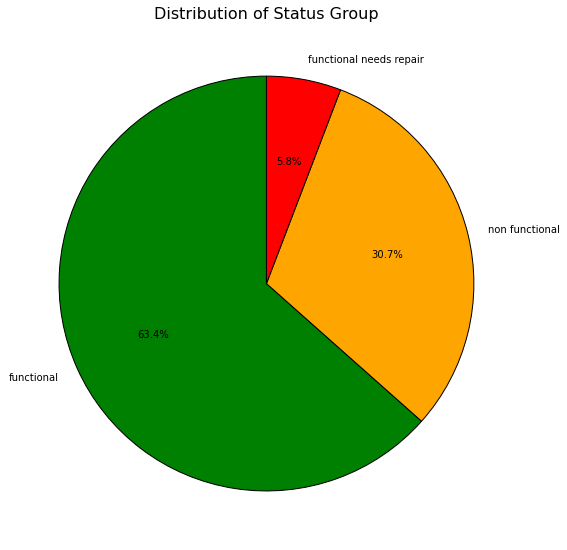

In [78]:
# Count the occurrences of each status_group
status_counts = merged_df['status_group'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
status_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['green', 'orange', 'red'], wedgeprops={'edgecolor': 'black'})

# Customize the plot
plt.title('Distribution of Status Group', fontsize=16)
plt.ylabel('')  # Remove the y-axis label for aesthetics
plt.tight_layout()

# Show the plot
plt.show()

### 3. Water Quality Distribution

Water quality plays a major role in the life span of water pumps. Factors in water quality, such as sediment content, chemical composition, and pH levels, can impact the pump's components over time.

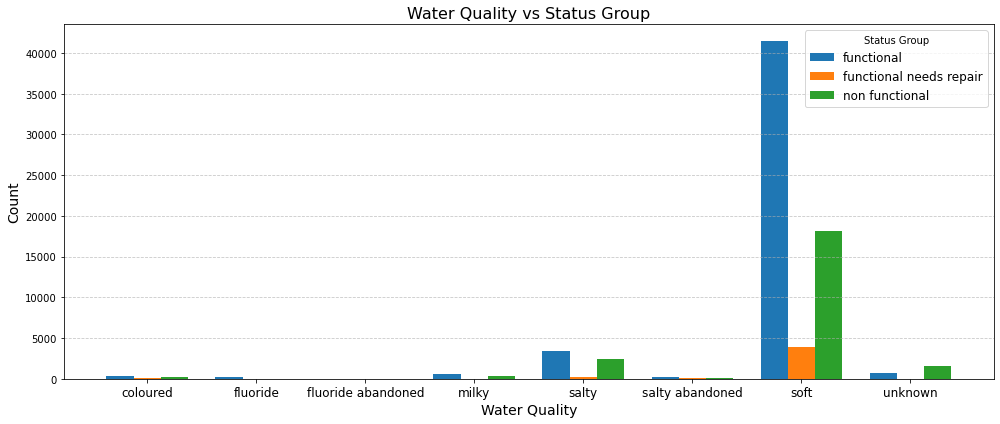

In [79]:
# Create a pivot table or grouped count
grouped = merged_df.groupby(['water_quality', 'status_group']).size().unstack(fill_value=0)

# Define the figure and axis
categories = grouped.index
status_groups = grouped.columns

x = np.arange(len(categories))  # Position of groups on x-axis
width = 0.25  # Width of each bar

# Create bars for each status group
fig, ax = plt.subplots(figsize=(14, 6))
for i, status in enumerate(status_groups):
    ax.bar(x + i * width, grouped[status], width, label=status)

# Customize the plot
ax.set_title('Water Quality vs Status Group', fontsize=16)
ax.set_xlabel('Water Quality', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_xticks(x + width * (len(status_groups) - 1) / 2)
ax.set_xticklabels(categories, fontsize=12)
ax.legend(title='Status Group', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show
plt.tight_layout()
plt.show()


### 4. Correlation Matrix

A correlation matrix helps us understand the relationship between different features in the dataset.

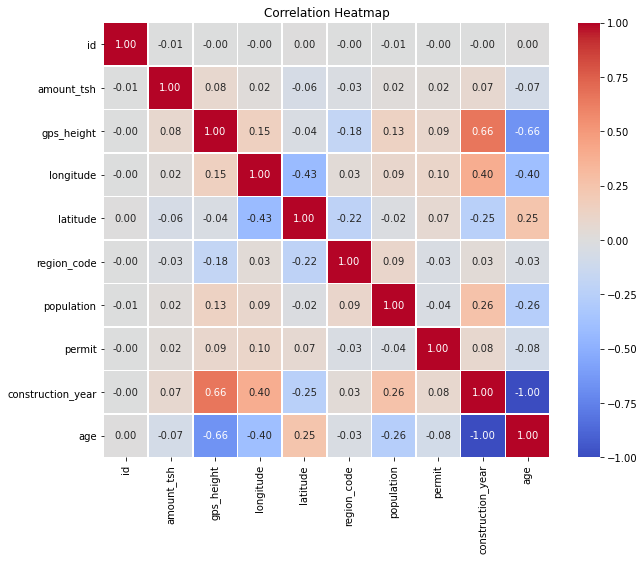

In [80]:
# Correlation matrix
corr = merged_df.corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Modeling

Splitting Data into Training and Validation Sets would be

In [81]:
merged_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 59399
Columns: 4669 entries, id to permit
dtypes: float64(3), int64(4664), object(2)
memory usage: 2.6+ GB


In [ ]:
# Assume you have a DataFrame `merged_df` with features and labels
X = merged_df.drop('target_column', axis=1)  # Features
y = merged_df['target_column']  # Labels (target)

# Split the dataset into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

### Evaluation